In [39]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [40]:
with open("all_clean_data.pkl", 'rb') as picklefile: 
    merge_housing = pickle.load(picklefile)
merge_housing.head()

BedSize  Year  Month  Apartment_rent Shift_Year Shift_Month  \
31  Studio  2013     10          1180.0       2013          10   
32  Studio  2013     11          1205.0       2013          11   
33  Studio  2013     12          1208.0       2013          12   
34  Studio  2014      1          1205.0       2014          01   
35  Studio  2014      2          1200.0       2014          02   

    Zillow_Housing_price  Search_Count_SeattleRent  \
31              430600.0                        40   
32              435300.0                        37   
33              430100.0                        42   
34              424600.0                        40   
35              424900.0                        46   

    Search_Count_SeattleHousing  Search_Count_seattleApartment  \
31                           25                             22   
32                           23                             24   
33                           27                             27   
34                           27                             26   
35                           27                             28   

            ...            count_news_seattle+shooting  \
31          ...                                   8170   
32          ...                                   9740   
33          ...                                   4420   
34          ...                                  10400   
35          ...                                  10500   

    count_news_seattle+murder  count_news_seattle+dead+shooting        Open  \
31                      10900                              5460  398.799988   
32                      13900                              6380  358.980011   
33                       7230                              3030  358.739990   
34                      14800                              6720  338.089996   
35                      15900                              7070  304.130005   

          High         Low       Close    AdjClose       Volume  \
31  408.059998  357.760010  358.690002  358.690002   81011900.0   
32  365.869995  337.730011  362.100006  362.100006   83009000.0   
33  383.109985  330.880005  336.369995  336.369995   75253500.0   
34  348.299988  288.000000  304.130005  304.130005  138278700.0   
35  314.869995  284.380005  312.549988  312.549988   78579200.0   

    target_Apartment_rent  
31                 1180.0  
32                 1205.0  
33                 1208.0  
34                 1205.0  
35                 1200.0  

[5 rows x 58 columns]

In [41]:
merge_housing=merge_housing.dropna()

In [42]:
studio_df = merge_housing.loc[merge_housing['BedSize'] == 'Studio']
oneBed_df = merge_housing.loc[merge_housing['BedSize'] == '1Bedroom']
twoBed_df = merge_housing.loc[merge_housing['BedSize'] == '2Bedroom']

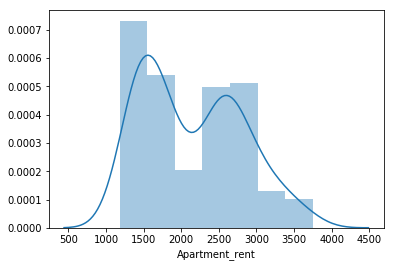

In [43]:
sns.distplot(merge_housing.Apartment_rent)

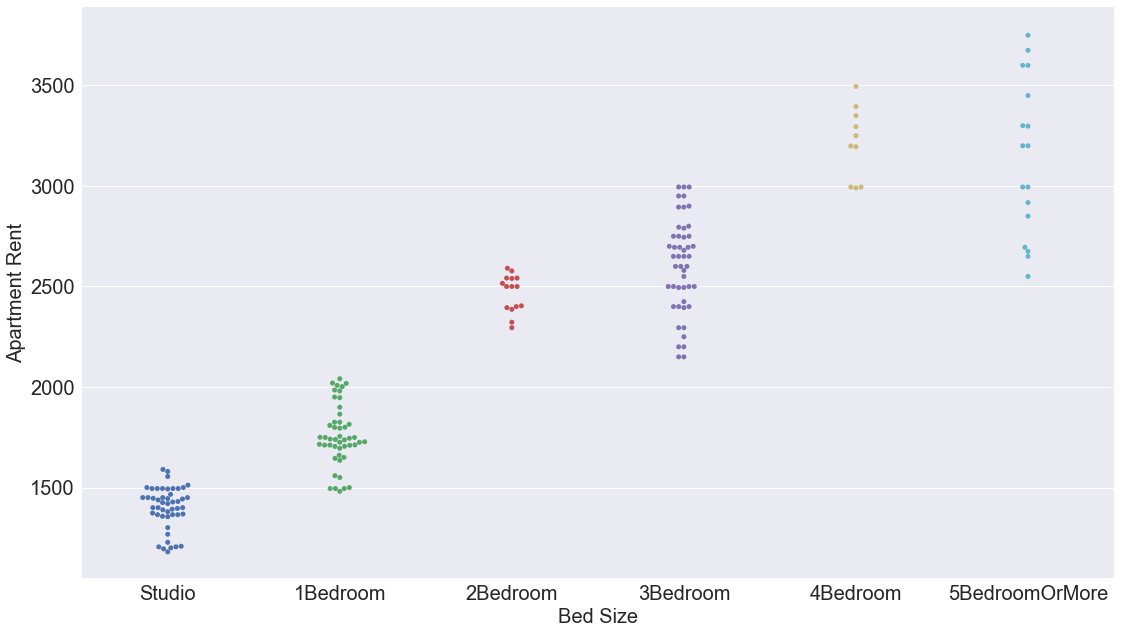

In [59]:
sns.set(font_scale = 2)
plt.subplots(figsize=(18.5, 10.5))
ax = sns.swarmplot(x=merge_housing['BedSize'], y=merge_housing['Apartment_rent'], data=merge_housing)
ax.set_ylabel('Apartment Rent', fontsize=20);
ax.set_xlabel('Bed Size', fontsize=20)

fig = ax.get_figure()
fig.savefig("swarmplot_Apartment_BedSize.png")

In [45]:
merge_housing.dtypes

BedSize                                     object
Year                                         int64
Month                                        int64
Apartment_rent                             float64
Shift_Year                                  object
Shift_Month                                 object
Zillow_Housing_price                       float64
Search_Count_SeattleRent                     int64
Search_Count_SeattleHousing                  int64
Search_Count_seattleApartment                int64
AvgSaleToList                              float64
AvgSaleToListMom                           float64
AvgSaleToListYoy                           float64
HomesSold                                    int64
HomesSoldMom                               float64
HomesSoldYoy                               float64
Inventory                                    int64
InventoryMom                               float64
InventoryYoy                               float64
MedianDom                      

In [46]:
selectColumns = ['Year','Month','Zillow_Housing_price'
                                     , 'Search_Count_SeattleHousing'
                                     , 'Search_Count_seattleApartment'
                                     , 'HomesSold'
                                     , 'MedianSalePrice'
                                     , 'Inventory'
                                     , 'SoldAboveListYoy'
                                     , 'PriceDropsMom'
                 ,'AvgSaleToList'
                 , 'count_news_seattle+shooting', 'count_news_seattle+murder', 'count_news_seattle+dead+shooting'
                                     , 'target_Apartment_rent'
                 , 'Close'

                ]

In [47]:
selected_col = merge_housing.loc[:, selectColumns]

In [48]:
merge_housing.corr()['target_Apartment_rent'].sort_values()

months_of_supply                   -0.375476
Inventory                          -0.323635
MedianDom                          -0.195239
HomesSoldYoy                       -0.173095
InventoryYoy                       -0.142956
NewListingsMom                     -0.093954
Search_Count_SeattleRent           -0.070089
HomesSoldMom                       -0.068318
AvgSaleToListMom                   -0.065289
SoldAboveListMom                   -0.062406
InventoryMom                       -0.058467
MedianPpsfMom                      -0.052022
Search_Count_seattleApartment      -0.048901
MedianListPriceMom                 -0.038844
Volume                             -0.038752
PriceDropsYoy                      -0.038689
PriceDrops                         -0.038084
NewListingsYoy                     -0.032556
NewListings                        -0.031416
Month                              -0.025913
MedianSalePriceMom                 -0.019493
PriceDropsMom                      -0.012689
months_of_

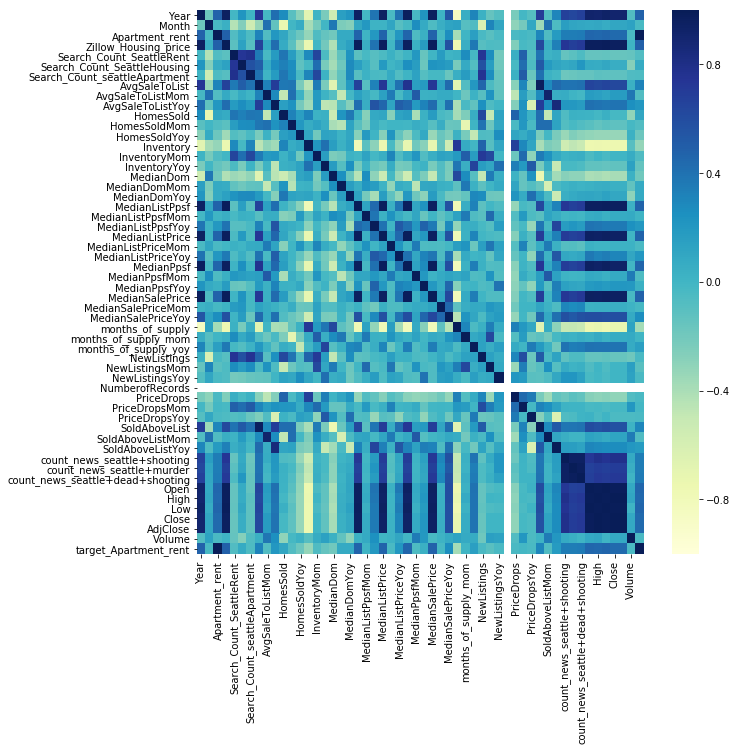

In [49]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

ax = sns.heatmap(merge_housing.corr(),cmap='YlGnBu', vmin=-1)
fig = ax.get_figure()
fig.savefig("heatmap.png")

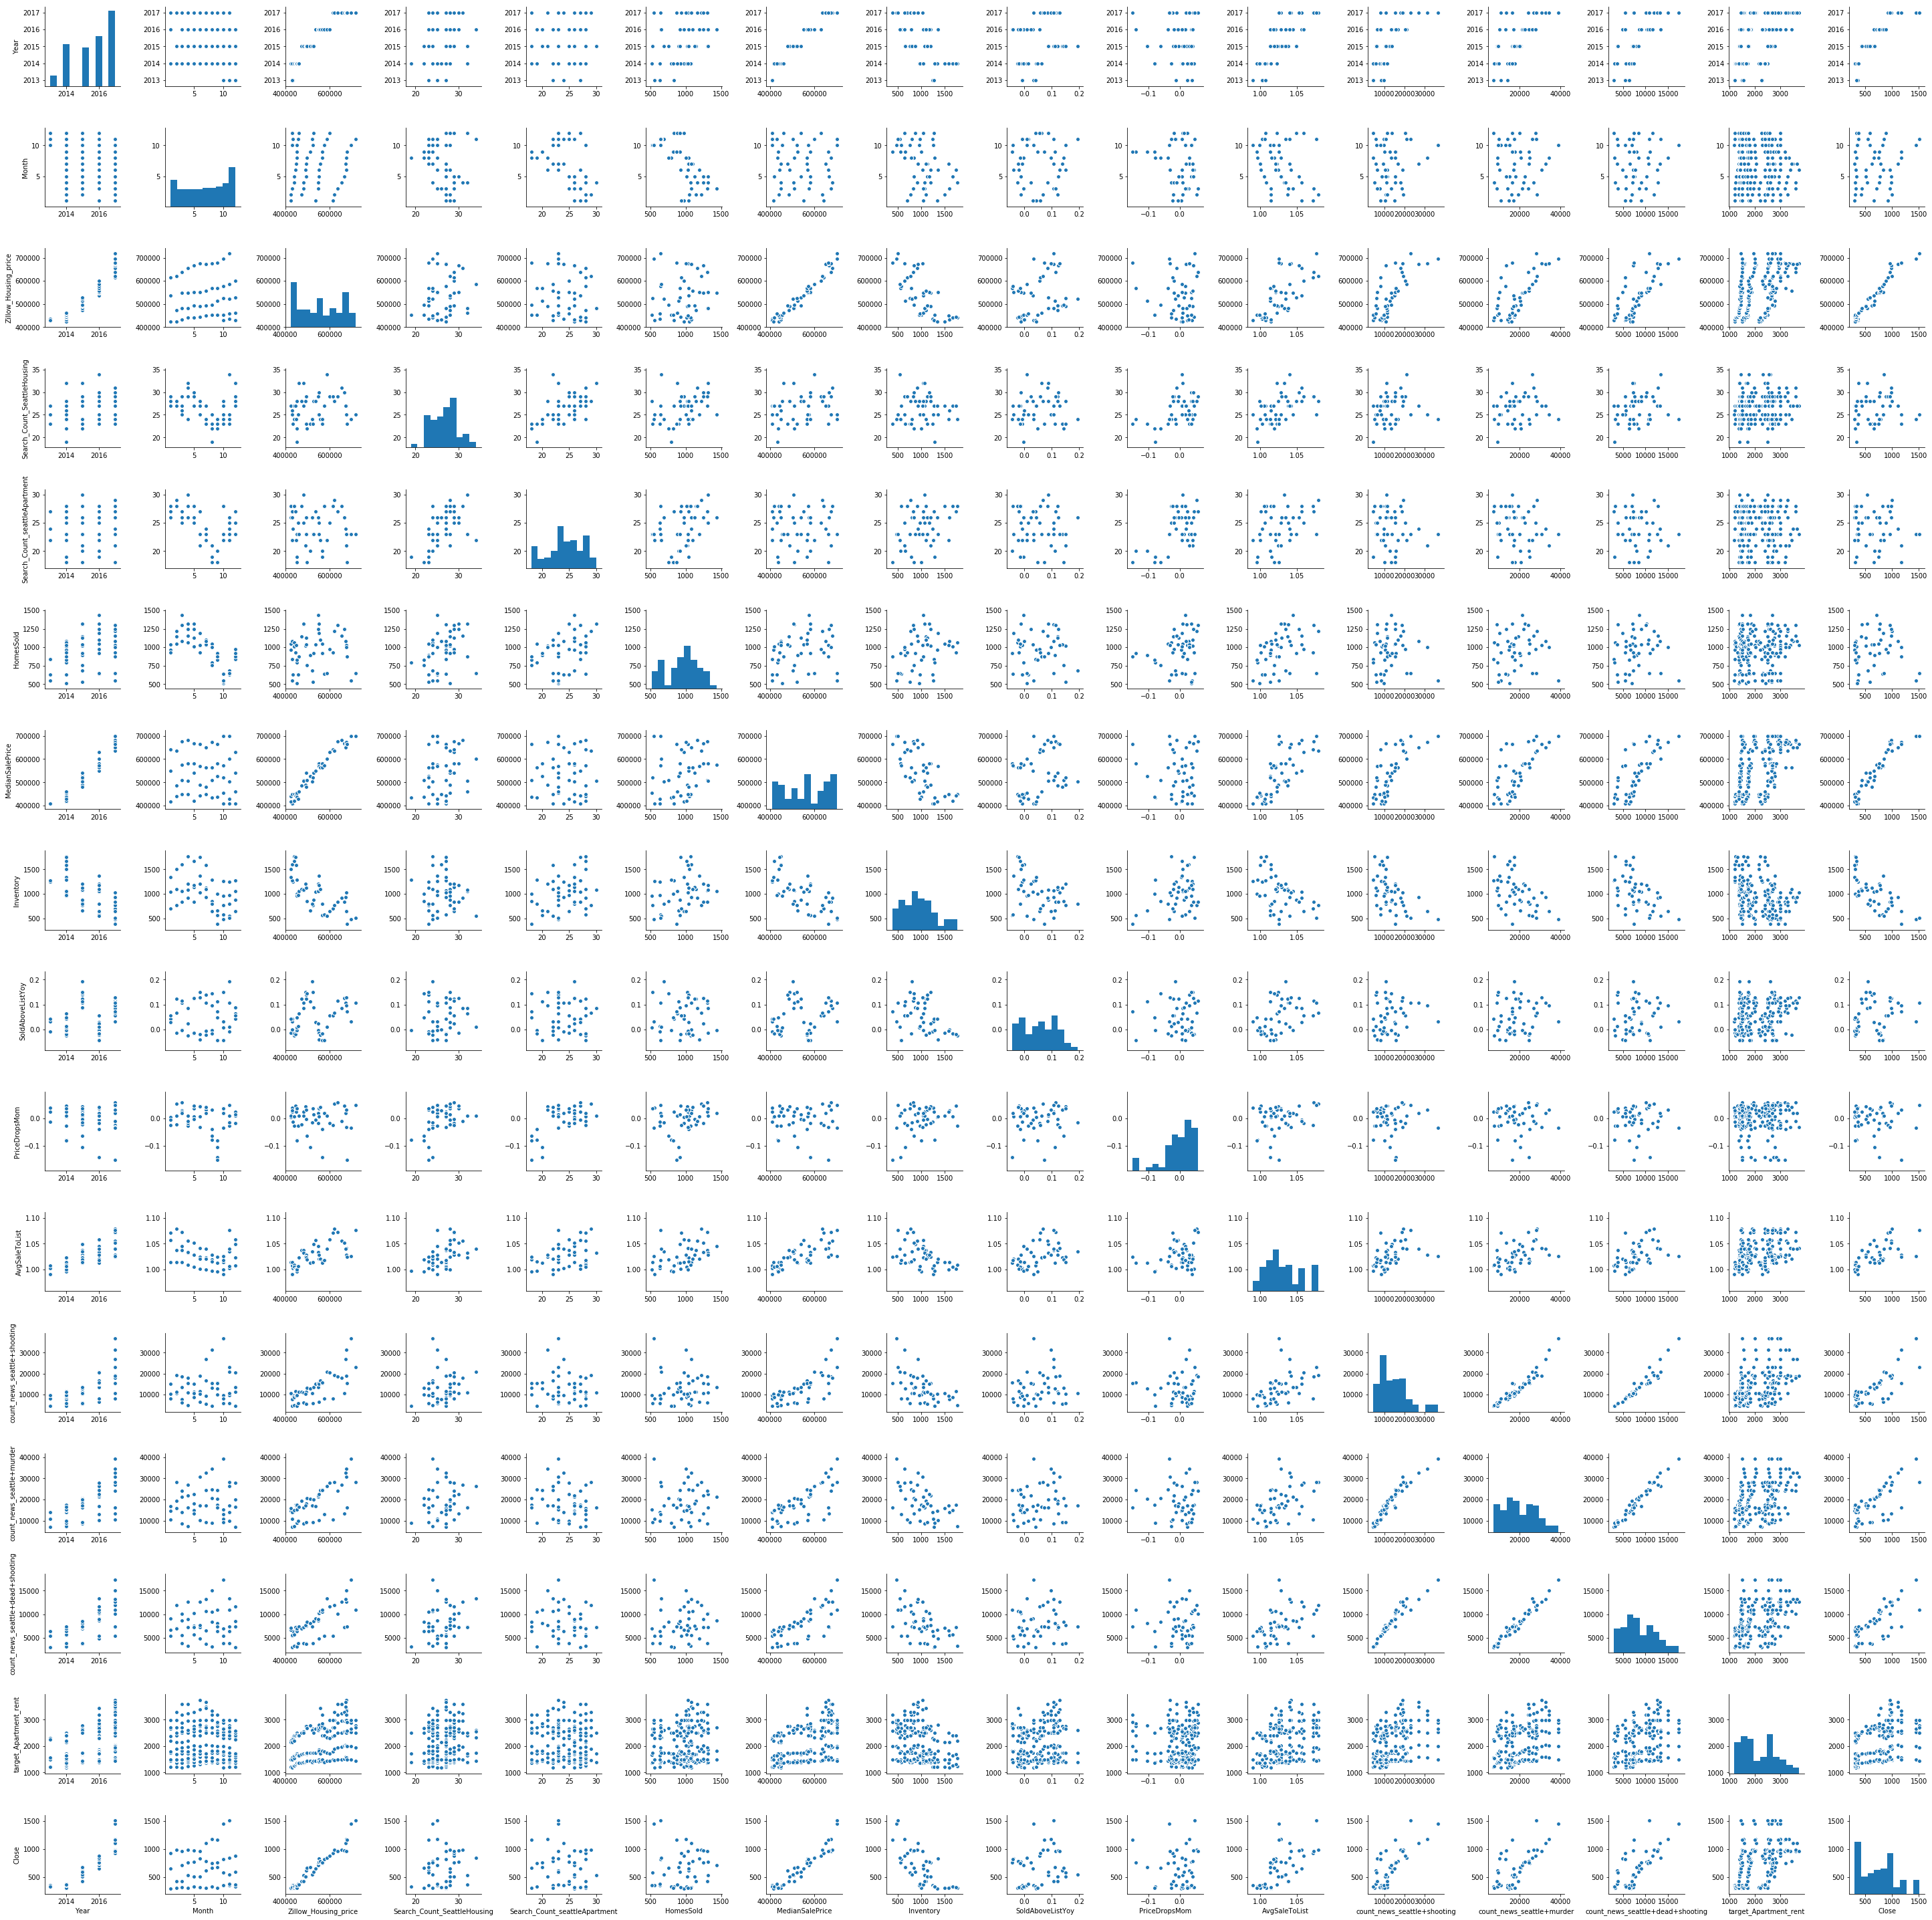

In [50]:
g = sns.pairplot(selected_col)

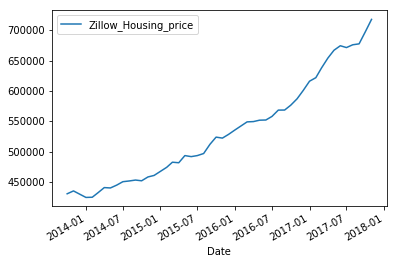

In [51]:
merge_housing.plot.line(x='Date', y='Zillow_Housing_price')

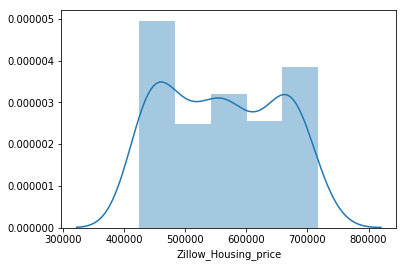

In [52]:
sns.distplot(merge_housing.Zillow_Housing_price.dropna())

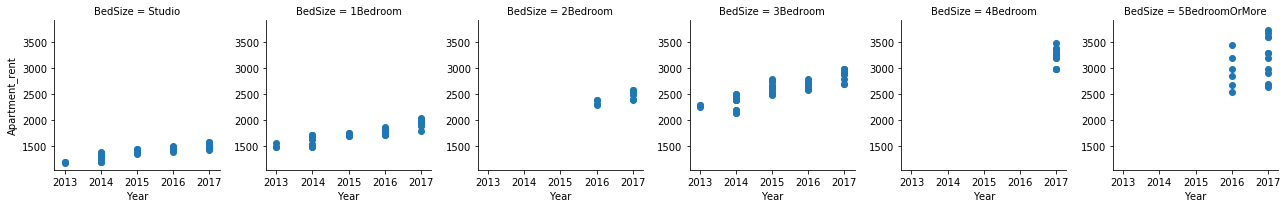

In [53]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(merge_housing, col='BedSize')
g.map(plt.scatter, 'Year', "Apartment_rent")



In [16]:
merge_housing['Year'].value_counts()

2017    65
2016    43
2014    36
2015    33
2013     9
Name: Year, dtype: int64

In [17]:
merge_housing['BedSize'].value_counts()

Studio            48
3Bedroom          48
1Bedroom          48
5BedroomOrMore    17
2Bedroom          15
4Bedroom          10
Name: BedSize, dtype: int64

In [18]:
#df_apartment_bedSize = pd.get_dummies(merge_housing['BedSize'])
#zillow_apartment_df_new = pd.concat([merge_housing, df_apartment_bedSize], axis=1)


In [19]:
# Get Average
zillow_apartment_grouped_df = merge_housing
zillow_apartment_grouped_df.groupby(['BedSize', 'Year', 'Month'], as_index=False)['Apartment_rent'].agg('mean')
zillow_apartment_grouped_df.head()

BedSize  Year  Month  Apartment_rent Shift_Year Shift_Month  \
31  Studio  2013     10          1180.0       2013          10   
32  Studio  2013     11          1205.0       2013          11   
33  Studio  2013     12          1208.0       2013          12   
34  Studio  2014      1          1205.0       2014          01   
35  Studio  2014      2          1200.0       2014          02   

    Zillow_Housing_price  Search_Count_SeattleRent  \
31              430600.0                        40   
32              435300.0                        37   
33              430100.0                        42   
34              424600.0                        40   
35              424900.0                        46   

    Search_Count_SeattleHousing  Search_Count_seattleApartment  \
31                           25                             22   
32                           23                             24   
33                           27                             27   
34                           27                             26   
35                           27                             28   

            ...            PriceDropsMom  PriceDropsYoy  SoldAboveList  \
31          ...                 0.039606       0.037088       0.277174   
32          ...                -0.012473       0.044360       0.331746   
33          ...                 0.024914       0.017092       0.404790   
34          ...                 0.004972       0.025687       0.453044   
35          ...                 0.010006       0.012604       0.439771   

    SoldAboveListMom  SoldAboveListYoy       Date  \
31          0.021826          0.032856 2013-10-01   
32          0.054572         -0.007477 2013-11-01   
33          0.073044          0.041376 2013-12-01   
34          0.048254          0.043381 2014-01-01   
35         -0.013274         -0.013229 2014-02-01   

    count_news_seattle+shooting  count_news_seattle+murder  \
31                         8170                      10900   
32                         9740                      13900   
33                         4420                       7230   
34                        10400                      14800   
35                        10500                      15900   

    count_news_seattle+dead+shooting  target_Apartment_rent  
31                              5460                 1180.0  
32                              6380                 1205.0  
33                              3030                 1208.0  
34                              6720                 1205.0  
35                              7070                 1200.0  

[5 rows x 52 columns]

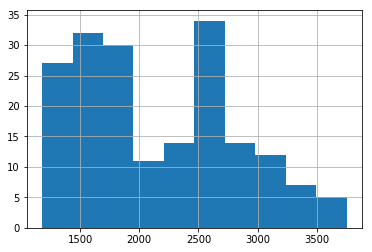

In [20]:
merge_housing['Apartment_rent'].hist()

In [21]:
studio_df['Year'].value_counts()

2014    12
2017    11
2016    11
2015    11
2013     3
Name: Year, dtype: int64

In [22]:
studio_df.head()

BedSize  Year  Month  Apartment_rent Shift_Year Shift_Month  \
31  Studio  2013     10          1180.0       2013          10   
32  Studio  2013     11          1205.0       2013          11   
33  Studio  2013     12          1208.0       2013          12   
34  Studio  2014      1          1205.0       2014          01   
35  Studio  2014      2          1200.0       2014          02   

    Zillow_Housing_price  Search_Count_SeattleRent  \
31              430600.0                        40   
32              435300.0                        37   
33              430100.0                        42   
34              424600.0                        40   
35              424900.0                        46   

    Search_Count_SeattleHousing  Search_Count_seattleApartment  \
31                           25                             22   
32                           23                             24   
33                           27                             27   
34                           27                             26   
35                           27                             28   

            ...            PriceDropsMom  PriceDropsYoy  SoldAboveList  \
31          ...                 0.039606       0.037088       0.277174   
32          ...                -0.012473       0.044360       0.331746   
33          ...                 0.024914       0.017092       0.404790   
34          ...                 0.004972       0.025687       0.453044   
35          ...                 0.010006       0.012604       0.439771   

    SoldAboveListMom  SoldAboveListYoy       Date  \
31          0.021826          0.032856 2013-10-01   
32          0.054572         -0.007477 2013-11-01   
33          0.073044          0.041376 2013-12-01   
34          0.048254          0.043381 2014-01-01   
35         -0.013274         -0.013229 2014-02-01   

    count_news_seattle+shooting  count_news_seattle+murder  \
31                         8170                      10900   
32                         9740                      13900   
33                         4420                       7230   
34                        10400                      14800   
35                        10500                      15900   

    count_news_seattle+dead+shooting  target_Apartment_rent  
31                              5460                 1180.0  
32                              6380                 1205.0  
33                              3030                 1208.0  
34                              6720                 1205.0  
35                              7070                 1200.0  

[5 rows x 52 columns]

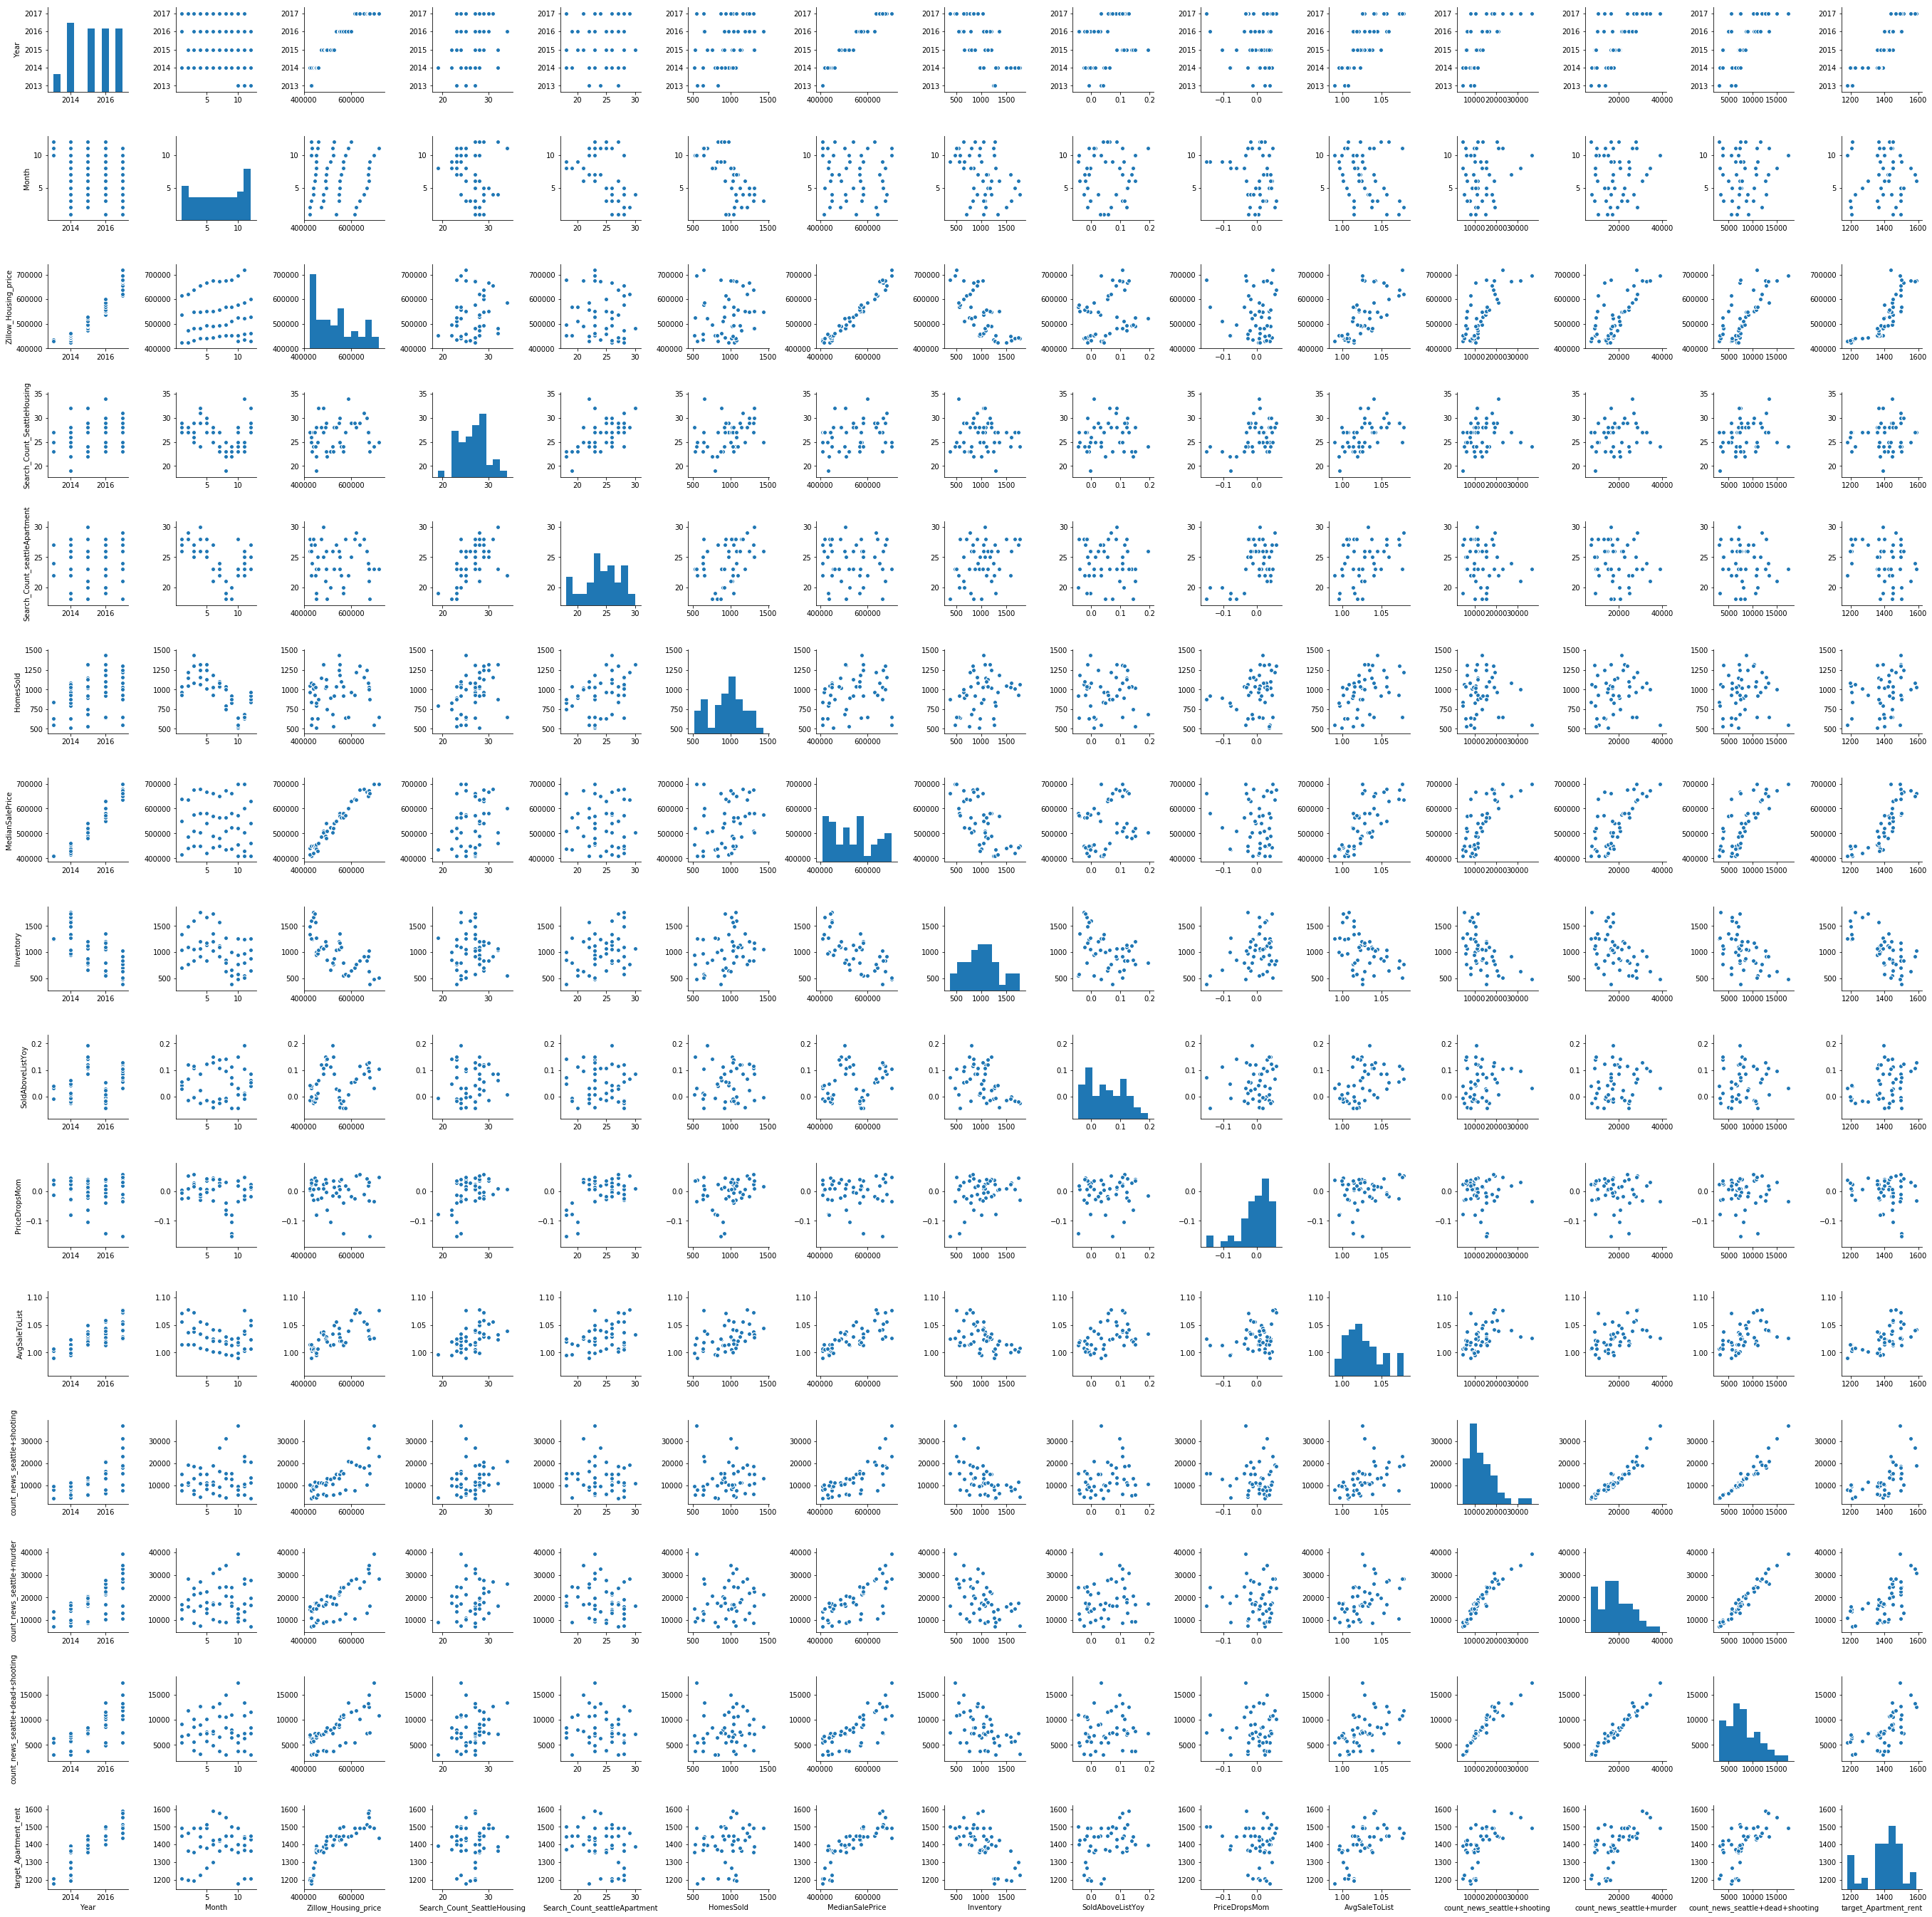

In [23]:
g = sns.pairplot(studio_df.loc[:, selectColumns])

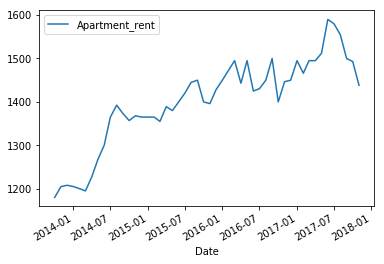

In [24]:
studio_df.plot(x='Date', y='Apartment_rent')

In [25]:
studio_df[studio_df.Apartment_rent < 1200]

BedSize  Year  Month  Apartment_rent Shift_Year Shift_Month  \
31  Studio  2013     10          1180.0       2013          10   
36  Studio  2014      3          1195.0       2014          03   

    Zillow_Housing_price  Search_Count_SeattleRent  \
31              430600.0                        40   
36              432300.0                        46   

    Search_Count_SeattleHousing  Search_Count_seattleApartment  \
31                           25                             22   
36                           26                             26   

            ...            PriceDropsMom  PriceDropsYoy  SoldAboveList  \
31          ...                 0.039606       0.037088       0.277174   
36          ...                 0.028404       0.033546       0.431608   

    SoldAboveListMom  SoldAboveListYoy       Date  \
31          0.021826          0.032856 2013-10-01   
36         -0.008162          0.000506 2014-03-01   

    count_news_seattle+shooting  count_news_seattle+murder  \
31                         8170                      10900   
36                         7710                      14200   

    count_news_seattle+dead+shooting  target_Apartment_rent  
31                              5460                 1180.0  
36                              5610                 1195.0  

[2 rows x 52 columns]

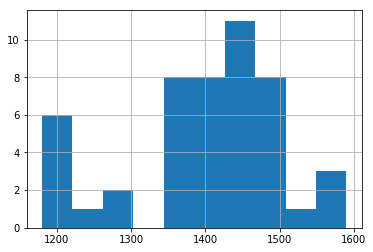

In [26]:
studio_df['Apartment_rent'].hist()

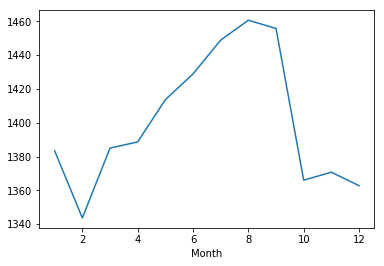

In [27]:
studio_df.groupby(['Month'])['target_Apartment_rent'].mean().plot()

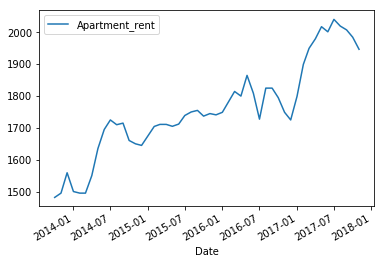

In [28]:
oneBed_df.plot.line(x='Date', y='Apartment_rent')

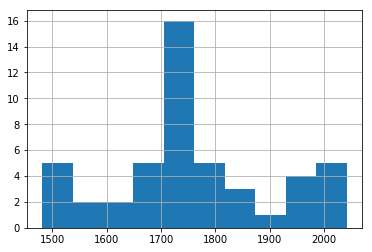

In [29]:
oneBed_df['Apartment_rent'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


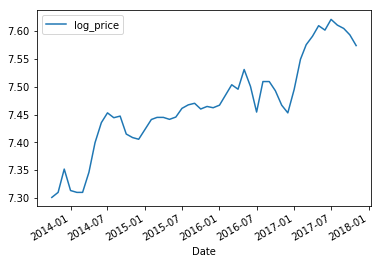

In [30]:
oneBed_df['log_price'] = np.log(oneBed_df['Apartment_rent'])
oneBed_df.plot.line(x='Date', y='log_price')

In [31]:
oneBed_df.head()

BedSize  Year  Month  Apartment_rent Shift_Year Shift_Month  \
117  1Bedroom  2013     10          1481.5       2013          10   
118  1Bedroom  2013     11          1495.0       2013          11   
119  1Bedroom  2013     12          1559.0       2013          12   
120  1Bedroom  2014      1          1500.0       2014          01   
121  1Bedroom  2014      2          1495.0       2014          02   

     Zillow_Housing_price  Search_Count_SeattleRent  \
117              430600.0                        40   
118              435300.0                        37   
119              430100.0                        42   
120              424600.0                        40   
121              424900.0                        46   

     Search_Count_SeattleHousing  Search_Count_seattleApartment    ...      \
117                           25                             22    ...       
118                           23                             24    ...       
119                           27                             27    ...       
120                           27                             26    ...       
121                           27                             28    ...       

     PriceDropsYoy  SoldAboveList  SoldAboveListMom  SoldAboveListYoy  \
117       0.037088       0.277174          0.021826          0.032856   
118       0.044360       0.331746          0.054572         -0.007477   
119       0.017092       0.404790          0.073044          0.041376   
120       0.025687       0.453044          0.048254          0.043381   
121       0.012604       0.439771         -0.013274         -0.013229   

          Date  count_news_seattle+shooting  count_news_seattle+murder  \
117 2013-10-01                         8170                      10900   
118 2013-11-01                         9740                      13900   
119 2013-12-01                         4420                       7230   
120 2014-01-01                        10400                      14800   
121 2014-02-01                        10500                      15900   

     count_news_seattle+dead+shooting  target_Apartment_rent  log_price  
117                              5460                 1481.5   7.300810  
118                              6380                 1495.0   7.309881  
119                              3030                 1559.0   7.351800  
120                              6720                 1500.0   7.313220  
121                              7070                 1495.0   7.309881  

[5 rows x 53 columns]

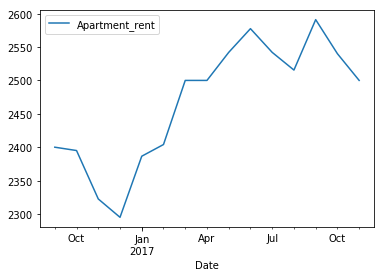

In [32]:
twoBed_df.plot.line(x='Date', y='Apartment_rent')

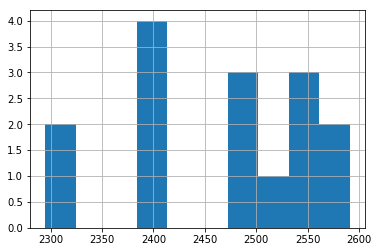

In [33]:
twoBed_df['Apartment_rent'].hist()

In [34]:
# Plot all of the variable-to-variable relations as scatterplots
#pd.scatter_matrix(merge_housing_dropNa.iloc[:, -5:-1], figsize=(12,8), s=10);

In [35]:
#merge_housing_dropNa.dtypes

In [36]:
studio_index = studio_df.set_index('Date')
studio_index.head()
y = studio_index.Apartment_rent
y.index.name = 'Date'
y.head()


Date
2013-10-01    1180.0
2013-11-01    1205.0
2013-12-01    1208.0
2014-01-01    1205.0
2014-02-01    1200.0
Name: Apartment_rent, dtype: float64

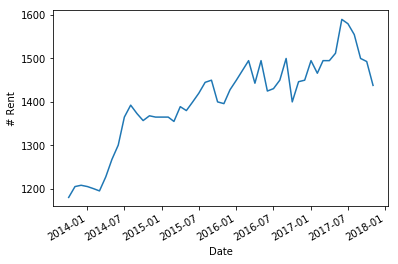

In [37]:
ax = y.plot();
ax.set_ylabel('# Rent');

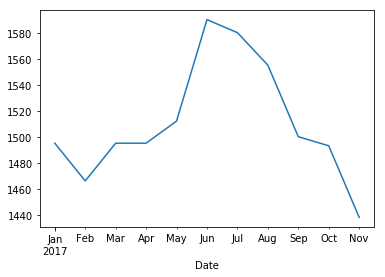

In [38]:
y.loc['2017-01-01':'2017-12-01'].plot();
